# SET UP YOUR ENVIRONMENT

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# LOAD THE DATASET 

In [4]:
dataset=pd.read_csv("online_retail.csv")

In [5]:
print(dataset.head(3))

  InvoiceNo StockCode                         Description  Quantity  \
0    536365    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                 WHITE METAL LANTERN         6   
2    536365    84406B      CREAM CUPID HEARTS COAT HANGER         8   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2  2010-12-01 08:26:00       2.75     17850.0  United Kingdom  


# EXPLORE THE DATASET

In [25]:
print(dataset.shape)

(406829, 9)


In [26]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
 8   TotalSales   406829 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 31.0+ MB
None


In [6]:
print(dataset.describe())

            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000


# PERFORMING BASIC CLEANING

In [10]:
print(dataset.isnull().sum().sum())

0


In [11]:
dataset=dataset.dropna()

In [12]:
dataset.drop(["InvoiceNo"],axis=1)

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
541904,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


# ADD THE TOTALSALES COLUMN

In [14]:
print(dataset.columns)

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


In [19]:
print(dataset[["Quantity","UnitPrice"]].isnull().sum())

Quantity     0
UnitPrice    0
dtype: int64


In [22]:
dataset["TotalSales"]=dataset["Quantity"]*dataset["UnitPrice"]

In [23]:
print(dataset.head(3))

  InvoiceNo StockCode                         Description  Quantity  \
0    536365    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                 WHITE METAL LANTERN         6   
2    536365    84406B      CREAM CUPID HEARTS COAT HANGER         8   

           InvoiceDate  UnitPrice  CustomerID         Country  TotalSales  
0  2010-12-01 08:26:00       2.55     17850.0  United Kingdom       15.30  
1  2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
2  2010-12-01 08:26:00       2.75     17850.0  United Kingdom       22.00  


# VISUALIZE THE DATASET

# ANALYZE THE DATASET

In [31]:
sales_by_country=dataset.groupby("Country")["TotalSales"].sum().sort_values(ascending=False)

In [33]:
print(sales_by_country.head(4))

Country
United Kingdom    6767873.394
Netherlands        284661.540
EIRE               250285.220
Germany            221698.210
Name: TotalSales, dtype: float64


#sales trend overtime

In [40]:
print(dataset["InvoiceDate"].head())

0    2010-12-01 08:26:00
1    2010-12-01 08:26:00
2    2010-12-01 08:26:00
3    2010-12-01 08:26:00
4    2010-12-01 08:26:00
Name: InvoiceDate, dtype: object


In [43]:
dataset["InvoiceDate"]=pd.to_datetime(dataset["InvoiceDate"])

In [48]:
sales_by_date=dataset.groupby(dataset["InvoiceDate"].dt.date)["TotalSales"].sum()

# PLOT THE SALES TREND

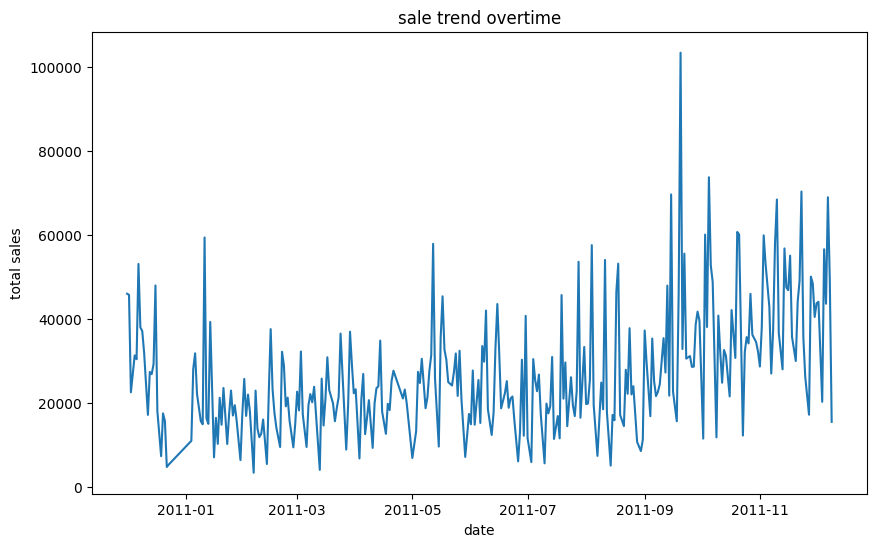

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sales_by_date.plot()
plt.title("sale trend overtime")
plt.xlabel("date")
plt.ylabel("total sales")
plt.show()

In [51]:
sales_by_product=dataset.groupby("Description")["TotalSales"].sum().sort_values(ascending=False)

In [53]:
print(sales_by_product.head(5))

Description
REGENCY CAKESTAND 3 TIER              132870.40
WHITE HANGING HEART T-LIGHT HOLDER     93823.85
JUMBO BAG RED RETROSPOT                83236.76
PARTY BUNTING                          67687.53
POSTAGE                                66710.24
Name: TotalSales, dtype: float64


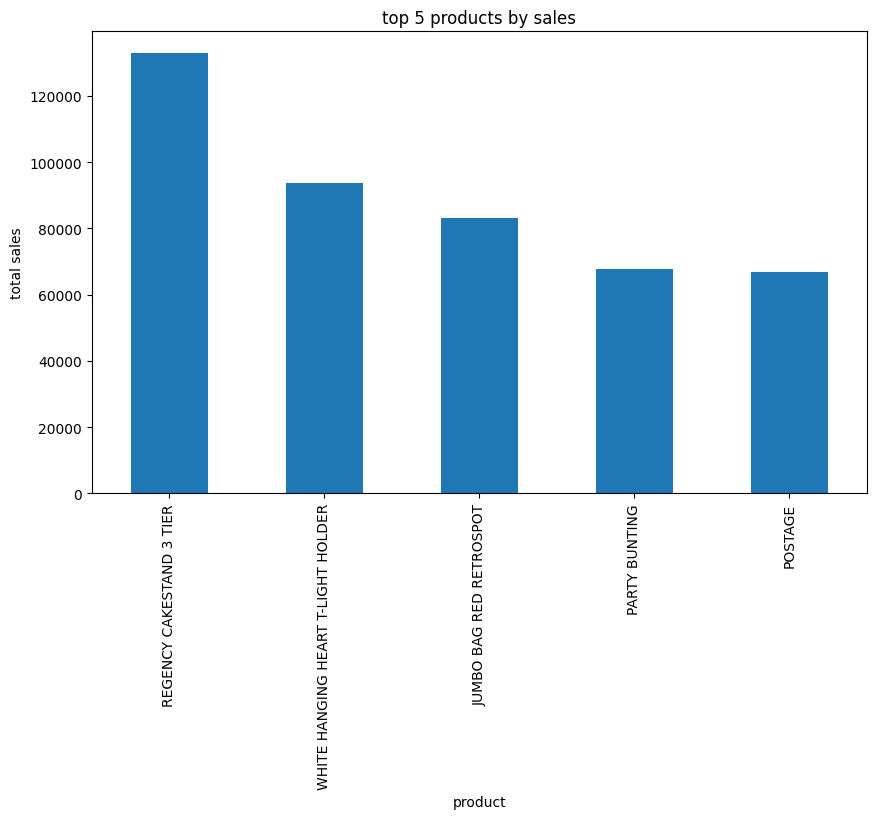

In [54]:
import matplotlib.pyplot as plt
top_5_products=sales_by_product.head(5)
plt.figure(figsize=(10,6))
top_5_products.plot(kind="bar")
plt.title("top 5 products by sales")
plt.xlabel("product")
plt.ylabel("total sales")
plt.show()

In [ ]:
# THE TOP-SELLING PRODUCT
#THE SALES TREND OVERTIME
#TOTAL SALES BY COUNTRY

In [67]:
dataset.to_csv("online_retail_dataset.csv",index=False)

In [68]:
import os
print(os.getcwd())

C:\Users\user\Downloads\online_retail.csv
